In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

/Users/henrikloejensen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# load Fashion MNIST dataset and normalize the data

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# define and compile the model

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors
    Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 classes and softmax activation
])

model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

/Users/henrikloejensen/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# train the model

In [7]:
history = model.fit(
    x_train, y_train, 
    epochs=20, 
    validation_split=0.2, 
    batch_size=64
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.7565 - loss: 0.7036 - val_accuracy: 0.8493 - val_loss: 0.4302
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8563 - loss: 0.4001 - val_accuracy: 0.8606 - val_loss: 0.3862
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.8716 - loss: 0.3535 - val_accuracy: 0.8572 - val_loss: 0.3920
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.8790 - loss: 0.3267 - val_accuracy: 0.8733 - val_loss: 0.3558
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.8902 - loss: 0.2998 - val_accuracy: 0.8795 - val_loss: 0.3386
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.8936 - loss: 0.2853 - val_accuracy: 0.8678 - val_loss: 0.3688
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.8988 - loss: 0.2740 - val_accuracy: 0.8763 - val_loss: 0.3483
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - accuracy: 0.9046 - loss: 0.2574 - 

In [8]:
# plot training and validation for accuracy and loss

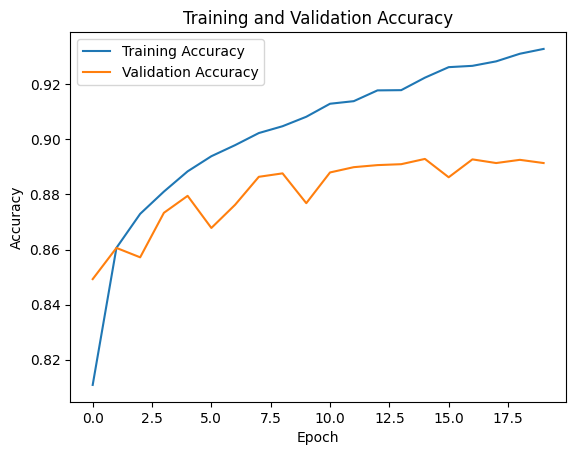

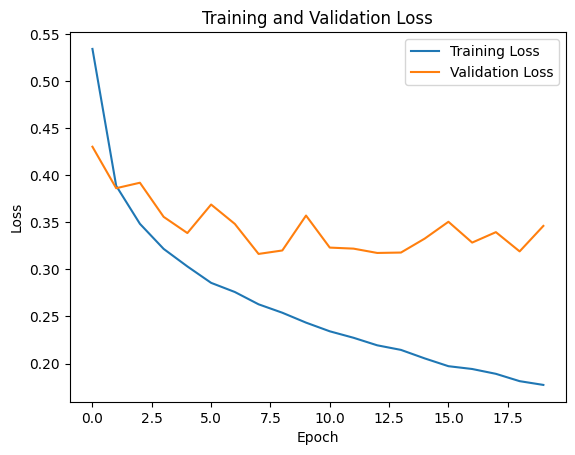

In [9]:
# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# evaluate the model on the test data

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.8784 - loss: 0.3669
Test Loss: 0.37665292620658875
Test Accuracy: 0.8795999884605408
